In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import RectBivariateSpline
from scipy import stats
import cv2
import pywt

# Load a sample images
flower = cv2.cvtColor(cv2.imread('images/flower.jpg'), cv2.COLOR_BGR2RGB)
veg = cv2.cvtColor(cv2.imread('images/veg.png'), cv2.COLOR_BGR2RGB)
girl= cv2.cvtColor(cv2.imread('images/girl2.png'), cv2.COLOR_BGR2RGB)

# Convert images to Grayscale
flower_img = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)
veg_img = cv2.cvtColor(veg, cv2.COLOR_RGB2GRAY)
girl_img = cv2.cvtColor(girl, cv2.COLOR_RGB2GRAY)

def show_images(images, titles, cmap=None, vmin=0, vmax=255):
    """Display a list of images using matplotlib."""
    plt.figure(figsize=(10, 5))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Understanding Digital Image Processing

## Image Enhancement in Spatial Domain
### 4.1	Introduction

Image enhancement refers to the process of improving the appearance of an image to make it more appealing or useful for a specific purpose. This can involve either making the image details clearer or adjusting its sharpness. The term "spatial domain" pertains to the image as it is, represented by the brightness of each pixel in a two-dimensional space.

When we talk about enhancing an image in the spatial domain, we mean that we are directly manipulating the pixel values of the image itself. This is different from transform domain methods, where we first convert the image to a different form (like a Fourier transform), make enhancements in that domain, and then convert back to the spatial domain.

The general formula for spatial domain transformations looks like this:
$$ g(x,y) = T [f(x,y)], $$

In this formula, $ f(x,y) $ represents the original image, $ T $ is the transformation function we apply, and $ g(x,y) $ is the resulting enhanced image.

There are numerous techniques available for image enhancement in the spatial domain. In the following sections of this chapter, we will dive deeper into the main methods used for this purpose.

### 4.2 Point Processing

Point processing is a technique in image enhancement where every pixel in an image is modified without considering the surrounding pixels. This means that each pixel is treated as a separate unit, and its new value is determined solely based on its original intensity. In other words, the neighborhood size for these operations is 1x1, which is the smallest it can be.

One key characteristic of point processing is that any two pixels with the same intensity in the original image will have the same intensity in the enhanced image as well. This is because the transformation applied to each pixel is dependent only on its own intensity, not on its location in the image or the intensities of the surrounding pixels.

Because point processing operations only need to store the current pixel's intensity and the transformation function, they require very little memory. This makes them a computationally efficient option for image enhancement.

We will explore application of point processing below.

#### Application of Point Processing:

##### 4.2.1 Brightness Manipulation
Point processing excels at adjusting the brightness of an image, since brightness is directly tied to pixel intensity. To change the brightness, a constant value is added to or subtracted from the intensity of every pixel in the image.

To increase the brightness of an image $ f(x,y) $, the operation is:
$$ g(x,y) = f(x,y) + c \quad $$

To decrease the brightness, the operation is:
$$ g(x,y) = f(x,y) - c \quad $$

Here, $ c $ is a constant value that determines how much the brightness will change.

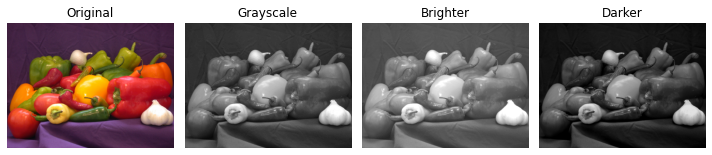

In [2]:
def change_brightness(image, value):
    """Change the brightness of an image by adding a constant value to all pixels.
    Positive value increases brightness, negative value decreases it."""
    enhanced_image = image.astype(np.int16) + value  # Use a data type that supports values > 255
    
    # Ensure values are within [0, 255] range without using np.clip
    enhanced_image[enhanced_image > 255] = 255
    enhanced_image[enhanced_image < 0] = 0
    # Ensure pixel values are in the valid range [0, 255] using np.clip
    ##  enhanced_image = np.clip(enhanced_image, 0, 255)  
    return enhanced_image.astype(np.uint8)


# Increase brightness by 30
# Note: For a grayscale image, it is a 2D array, so we don't need to convert it to RGB
brighter_image = change_brightness(veg_img, 30)

# Decrease brightness by 30
darker_image = change_brightness(veg_img, -30)

# Show original , brighter, and darker images side by side
show_images([veg, veg_img, brighter_image, darker_image], ['Original','Grayscale', 'Brighter', 'Darker'], cmap='gray')


##### 4.2.2  Inverse Transformation
Inverse Transformation, also known as Image Negative, is a point processing technique in image processing that reverses the brightness levels of all pixels in an image. In simpler terms, it turns dark areas bright and bright areas dark. 

Mathematically, this is done by subtracting each pixel's intensity value from the maximum possible pixel value. The formula for this transformation is:

$$ g(x,y) = \text{Maximum pixel value} - f(x,y) $$

This technique is particularly useful when you want to bring out details hidden in the darker regions of an image, especially when these dark regions are prominent.

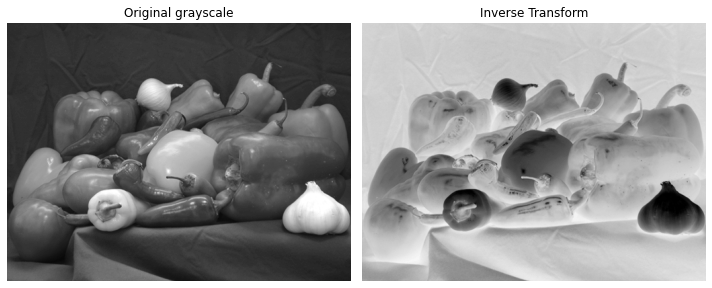

In [3]:
def inverse_transformation(image):
    """Apply inverse transformation to enhance dark regions in an image."""
    return 255 - image

it_image = inverse_transformation(veg_img)

show_images([veg_img, it_image], ['Original grayscale', 'Inverse Transform'], cmap='gray')

##### 4.2.3  Contrast Manipulation

Contrast manipulation is a point processing technique used to adjust the range of intensity values in an image. This process affects how bright or dark the image appears and can help to enhance certain features within the image.

The basic idea behind contrast manipulation is to multiply each pixel's intensity value by a certain factor, `c`. The formula for contrast manipulation is:

$$ g(x, y) = f(x, y) \times c $$

- If `c > 1`, the contrast is increased, making bright areas brighter and dark areas darker.
- If `c < 1`, the contrast is decreased, compressing the range of intensity values.

In simpler terms, you're stretching or compressing the range of intensity values in the image.

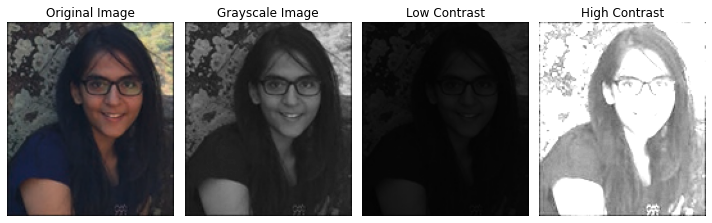

In [4]:
def adjust_contrast(image, contrast_factor):
    """
    Adjusts the contrast of the image.
    :param image: Input image (grayscale)
    :param contrast_factor: Contrast manipulation factor
    :return: Image with adjusted contrast
    """
    # Ensure the image is in float format to prevent data type overflow
    image = image.astype(np.float32)
    
    # Apply the contrast manipulation
    adjusted_image = image * contrast_factor
    
    # Ensure values are within [0, 255] range without using np.clip
    adjusted_image[adjusted_image > 255] = 255
    adjusted_image[adjusted_image < 0] = 0
    
    # Ensure pixel values are in the valid range [0, 255] using np.clip
    ##  adjusted_image = np.clip(adjusted_image, 0, 255)
    
    # Convert back to 8-bit unsigned integer
    adjusted_image = adjusted_image.astype(np.uint8)
    
    return adjusted_image

# Apply contrast manipulation
low_contrast_image = adjust_contrast(girl_img, 0.20)
high_contrast_image = adjust_contrast(girl_img, 5)


# Display the images
show_images([girl, girl_img, low_contrast_image, high_contrast_image], ['Original Image', 'Grayscale Image','Low Contrast', 'High Contrast'], cmap='gray')

##### 4.2.4 Log Transformations 

In image processing, log transformation is a method used to modify the dynamic range of pixel values in an image, especially when the original image contains details hidden in the shadows or details that are subdued in the brighter areas.

The mathematical formula for log transformation is:
$g(x,y) = c \times \log(1 + f(x,y)) $
where:
- $ g(x,y) $ is the output image.
- $ f(x,y) $ is the input image.
- $ c $ is a scaling constant.
- The $ \log $ refers to the natural logarithm.

Here's what happens during a log transformation:
1. The natural logarithm increases slowly as its argument grows. Hence, the log transformation compresses the higher values in the image more than the lower values. This effectively spreads out the lower graylevel values while compressing the higher values.
2. The reason for adding 1 before taking the logarithm is to avoid the logarithm of zero, which is undefined.
3. The constant $ c $ is used for scaling the output image to the desired range.

**Application:** 
Log transformations are useful in enhancing the details of a dark image, especially if the dynamic range of the original image is small. For instance, when you're dealing with astronomical images or medical images like X-rays where small intensity variations matter, log transformations can be valuable.

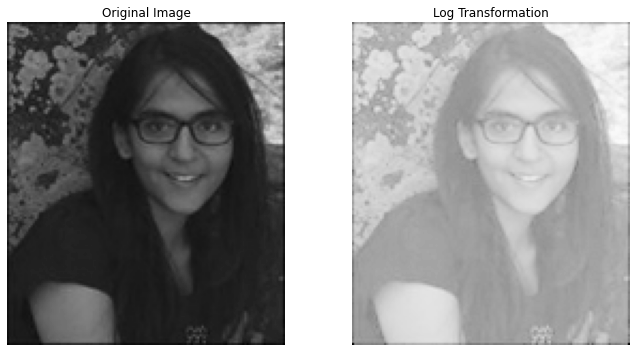

In [5]:
def log_transformation(image, c=1):
    # Apply log transformation
    output_image = c * np.log(1 + image.astype(np.float32))
    
    # Normalize the output image to the range [0, 255]
    output_image = cv2.normalize(output_image, None, 0, 255, cv2.NORM_MINMAX)
    
    return output_image.astype(np.uint8)

log_transformed_image = log_transformation(girl_img, c=1)
show_images([girl_img, log_transformed_image], ['Original Image', 'Log Transformation'], cmap='gray')


**Note:** The value of the scaling constant $ c $ will determine the contrast of the output image. You can adjust $ c $ as per the desired effect. A value of 1 is used here as a starting point.

##### 4.2.5 Power-law Transformations in Image Processing:

In image processing, the power-law (or gamma) transformation is used to control the brightness and contrast of an image. It's particularly useful because it's a non-linear transformation that offers more versatility than linear transformations.

The formula for power-law transformation is:
$$g(x,y) = c \times [f(x,y)]^\gamma$$
where:
- $ g(x,y) $ is the output image.
- $ f(x,y) $ is the input image.
- $ c $ and $ \gamma $ are positive constants.

By varying the value of $ \gamma $, different enhancement effects can be achieved:
- When $ \gamma < 1 $: The image will appear darker, enhancing the high-intensity values in the image.
- When $ \gamma > 1 $: The image will appear brighter, emphasizing the low-intensity values.

**Gamma Correction:**
Many electronic devices, such as monitors and printers, have a power-law response to the intensity of light, meaning the device does not reproduce the brightness of colors linearly. This effect can lead to images appearing differently than intended when displayed on these devices. To correct for this, gamma correction is applied, which adjusts the image so that it displays as intended on these nonlinear devices. 

Gamma correction can be thought of as a power-law transformation, where the gamma value is chosen to offset the gamma of the device.



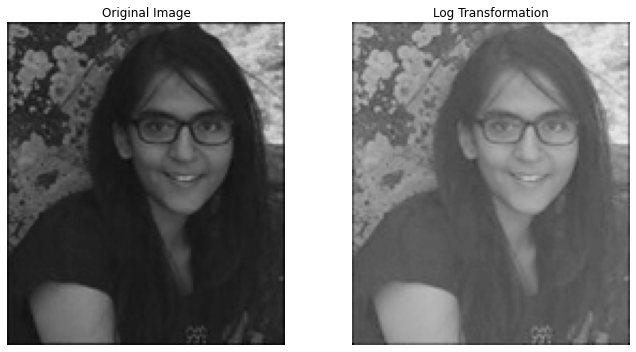

In [6]:
def power_law_transformation(image, c=1, gamma=1):
    # Ensure image values are in the range [0,1]
    image_normalized = image.astype(np.float32) / 255.0
    
    # Apply the power-law transformation
    output_image = c * np.power(image_normalized, gamma)
    
    # Convert the output values to the range [0,255]
    output_image = np.clip(output_image * 255.0, 0, 255)
    
    return output_image.astype(np.uint8)

power_law_transformed_image = power_law_transformation(girl_img, c=1, gamma=0.5)

show_images([girl_img, power_law_transformed_image], ['Original Image', 'Log Transformation'], cmap='gray')

**Note:** In the example above, we've applied a power-law transformation with $ c=1 $ and $ \gamma=0.5 $ to demonstrate its effect. You can adjust $ c $ and $ \gamma $ values to see different results.

##### 4.2.6 Piecewise-Linear Transformations:
In image processing, point processing refers to applying a transformation to each pixel in an image. The term "piecewise-linear" means that the transformation isn't a single, continuous formula applied uniformly to all pixel values. Instead, different formulas are applied to different ranges of pixel intensities. Two common piecewise-linear transformations are:

1. **Intensity-level slicing**:
   
   **Purpose**: To emphasize or highlight specific gray-level values in an image.
   
   **Applications**: For instance, in medical imaging, if you want to highlight a specific tissue type or feature in an X-ray, you might use intensity-level slicing
   
   **How it works**:
   - You choose a range of intensities, represented as $[A, B]$.
   - There are two main methods:
     * Highlight intensities within the range $[A, B]$ and reduce all other intensities. This transformation can be represented as:
       $$
       g(x,y) = 
       \begin{cases} 
       255 & \text{if } A \leq f(x,y) \leq B \\
       0 & \text{otherwise}
       \end{cases}
       $$
     * Highlight intensities within the range $[A, B]$ and leave all other pixel values unchanged.
       $$
       g(x,y) = 
       \begin{cases} 
       255 & \text{if } A \leq f(x,y) \leq B \\
       f(x,y) & \text{otherwise}
       \end{cases}
       $$

2. **Thresholding**:
   
   **Purpose**: Segment or distinguish objects or features in an image based on their intensity.
   
   **Applications**: Commonly used for binary image processing, object detection, and background subtraction.
   
   **How it works**:
   - You set a threshold value, represented as $T$.
   - Pixels with intensity above the threshold are set to a certain value (usually maximum, e.g., 255 for white for an 8-bit image), and those below the threshold are set to another value (usually minimum, e.g., 0 for black).
     $$
     g(x,y) = 
     \begin{cases} 
     255 & \text{if } f(x,y) > T \\
     0 & \text{otherwise}
     \end{cases}
     $$

These transformations can be applied on grayscale images to highlight specific features, segments, or regions of interest. The transformations are defined based on the pixel intensities and the desired output. The choice of transformation and its parameters often depend on the specific problem being addressed and the nature of the image data.

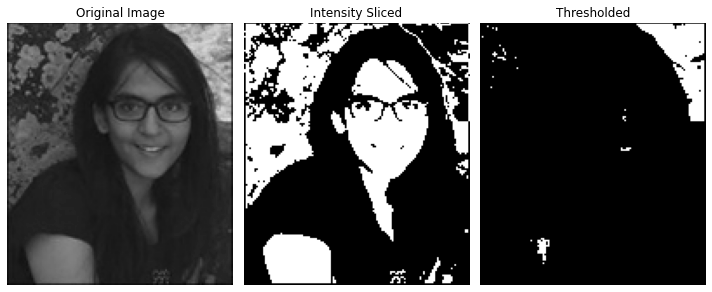

In [7]:
def intensity_level_slicing(image, A, B, preserve=False):
    # Create an output image initialized to zeros (or the same as input if preserving).
    output = np.zeros_like(image) if not preserve else np.copy(image)
    
    # Highlight the pixels within the range [A, B]
    mask = (image >= A) & (image <= B)
    output[mask] = 255
    
    return output

def thresholding(image, threshold):
    return np.where(image > threshold, 255, 0)


# Apply intensity-level slicing and thresholding
sliced_image = intensity_level_slicing(girl_img, 50, 150)
thresholded_image = thresholding(girl_img, 127)

show_images([girl_img, sliced_image, thresholded_image], ['Original Image', 'Intensity Sliced', 'Thresholded'], cmap='gray')

### 4.3	Mask Processing

In image processing, particularly in spatial domain enhancement, the neighborhood or surrounding pixels play a significant role in determining the outcome of the central pixel. Mask processing refers to this method where a mask (or kernel or window) is overlaid on the image and slid across the entire image to generate a new, processed image.

###### Key Points:

1. **Mask or Kernel**: It's a small matrix (typically of odd dimensions like 3x3, 5x5, etc.) used to modify the central pixel based on its own value and the values of its neighbors.

2. **Moving the Mask**: The mask moves across the image. For every position, the central pixel of the mask aligns with a pixel in the image.

3. **Processed Value**: At each position, a new value for the central pixel is calculated based on the weighted sum of all pixels under the mask. These weights are the values inside the mask itself.

4. **Symmetric vs. Non-symmetric Masks**: While typically the center of the mask corresponds with the pixel being operated on, in non-symmetric masks, any pixel under the mask can be considered the origin.

5. **Spatial Filtering**: This is the process of modifying the pixel value based on its neighbors. It's the core of mask processing.

6. **Types of Filters**: Masks can either be used for smoothing (blurring the image, also known as low-pass filters) or for sharpening (making edges more distinct, also known as high-pass filters).


If you have an image $ f $ and a mask $ w $, the processed image $ g $ is given by:

$$ g(x, y) = \sum_{r} \sum_{s} f(x + r, y + s) \times w(r, s) $$

This means for each position $(x,y)$ in the image, we consider all the surrounding pixels (defined by the mask dimensions) and their corresponding weights in the mask, and sum up their weighted values.

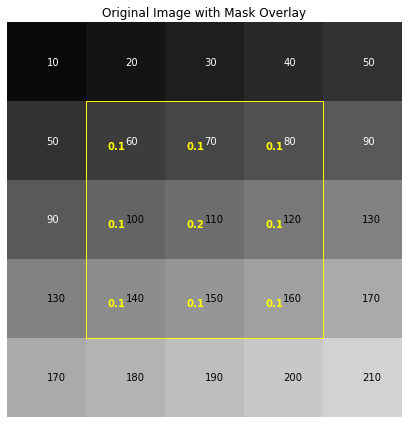

In [8]:
# Define a small 5x5 image for demonstration
image = np.array([[10, 20, 30, 40, 50],
                  [50, 60, 70, 80, 90],
                  [90, 100, 110, 120, 130],
                  [130, 140, 150, 160, 170],
                  [170, 180, 190, 200, 210]])

# Define the mask
mask = np.array([[0.1, 0.1, 0.1],
                 [0.1, 0.2, 0.1],
                 [0.1, 0.1, 0.1]])

# Display the images
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)
ax.set_title("Original Image with Mask Overlay")

# Add pixel values to the image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        color = 'w' if image[i, j] < 100 else 'k'
        ax.text(j, i, int(image[i, j]), ha='left', va='center', color=color, fontsize=10)

# Highlighting the 3x3 mask region by drawing a rectangle
rect = plt.Rectangle((0.5,0.5), 3, 3, fill=False, color='yellow', linewidth=1)
ax.add_patch(rect)

# Display mask values in yellow alongside the original values
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        ax.text(j+1, i+1, "{:.1f}".format(mask[i, j]), ha='right', va='top', color='yellow', fontsize=10, fontweight='bold')

ax.axis('off')

plt.tight_layout()
plt.show()

The code below demonstrates image masking using convolution. The `filter2D` function applies a given mask (or kernel) to a grayscale image (`girl_img`).

1. The dimensions of the image and kernel are determined.
2. Padding is added to the image to ensure the output size remains consistent with the input. The padding is determined based on the kernel size.
3. An output image is initialized with zeros.
4. The function then iteratively applies the kernel to regions of the image (often referred to as the region of interest or ROI). This is done by multiplying the kernel with the ROI and summing up the resulting values.
5. The computed value is stored in the corresponding pixel of the output image.
6. After processing all regions, any pixel values in the output outside the [0, 255] range are clipped to this range.
7. Finally, the original and the processed images are displayed side by side for comparison.

The kernel in the code, a 3x3 matrix, acts as a filter that emphasizes the center pixel in each ROI.

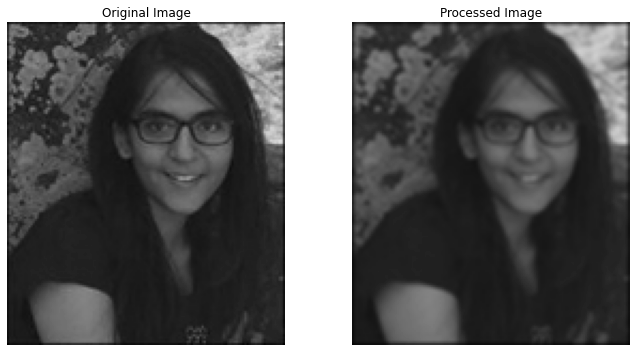

In [9]:
def filter2D(image, kernel):
    # Get dimensions of the image and kernel
    iH, iW = image.shape
    kH, kW = kernel.shape

    # Calculate padding dimensions
    pad = (kW - 1) // 2

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)))

    # Initialize the output image with zeros
    output = np.zeros((iH, iW), dtype="float32")

    # Apply convolution
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # Extract the region of interest (ROI) of the image
            roi = padded_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            
            # Apply the kernel to the ROI via multiplication and then summing the values
            k = (roi * kernel).sum()

            # Store the result in the output image
            output[y - pad, x - pad] = k

    # Clip values to be in the range [0, 255] 
    output = np.clip(output, 0, 255).astype("uint8")
    
    return output

kernel = np.array([[0.1, 0.1, 0.1],
                   [0.1, 0.2, 0.1],
                   [0.1, 0.1, 0.1]])

# Apply the mask using convolution
processed_image = filter2D(girl_img, kernel)

show_images([girl_img, processed_image], ['Original Image', 'Processed Image'], cmap='gray')

### 4.4 Smoothing Filters

Smoothing filters are essential tools in image processing, designed to reduce noise and diminish minor details. The fundamental concept is to modify the intensity of a pixel to reflect some form of an average of the intensities of surrounding pixels. This averaging process can effectively suppress isolated noise and smooth out fluctuations in the image's brightness or color.

The process of smoothing involves using a mask, also referred to as a kernel, which moves across the image. For each position of the mask, a new pixel value is calculated as the sum of the product of the image pixels and the corresponding mask coefficients. The result is then used to replace the pixel intensity at the mask's center.

There are several types of smoothing filters:

###### 4.4.1 Smoothing Linear Filters (Averaging Filters):
Smoothing linear filters are also called averaging filters. In these filters, every pixel value is replaced by the average value of intensities of its neighborhood.

1. **Uniform Averaging (Box Filter):**
   - This filter smooths the image by replacing the value of each pixel with the average value of the pixel intensities in its neighborhood.
   - The operation is called "uniform averaging" because it treats all pixels within the filter's mask equally, without giving any extra importance to any particular pixel. Each pixel's intensity value within the kernel contributes equally to the computed average.
   - The mask values must be normalized so that their sum equals 1, preventing any change to the overall brightness of the image.
   - Formula:
        $$ f(x, y) = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} g(x+i, y+j) $$
    where \( f \) is the output image, \( g \) is the input image, and \( m \times n \) denotes the mask size.
   - Example Mask (normalized):
        $$
        \frac{1}{9} \times \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 1 & 1 \\
        1 & 1 & 1 \\
        \end{bmatrix}
       $$

2. **Weighted Averaging:**
   - A weighted average filter assigns different weights to the pixels within the mask, often giving more significance to the central pixel and less to those farther away. The idea is to give a stronger influence to pixels that are closer to the target pixel, based on the assumption that they are more likely to be similar in intensity and color.
   - The weights are chosen based on a specific criterion, like the spatial closeness of a pixel to the center. A common example of a weighted average filter is the Gaussian filter, where the weights decrease with distance from the center following a Gaussian distribution.
   - The weights \( w_{ij} \) should sum up to 1 after normalization to maintain image brightness.
   - Formula:
        $$
        f(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} w_{ij} \cdot g(x+i, y+j)
        $$
     where \( f(x, y) \) is the new intensity value after filtering, \( g(x+i, y+j) \) is the original intensity value, and \( w_{ij} \) is the weight for the corresponding pixel.
   - Example Mask (normalized):
       $$
        \frac{1}{16} \times \begin{bmatrix}
        1 & 2 & 1 \\
        2 & 4 & 2 \\
        1 & 2 & 1 \\
        \end{bmatrix}
        $$

#### Impact of Smoothing Filters:
The main effect of employing these filters is the suppression of fine image details, yielding a smoother visual. Increasing the size of the mask extends the smoothing effect, leading to more pronounced blurring and further loss of detail. The choice of mask size and type of averaging (uniform vs. weighted) allows for control over the degree of smoothing applied, balancing between noise reduction and detail preservation. The specific shape and size of the mask can be tailored to the characteristics of the noise or details one wishes to suppress.

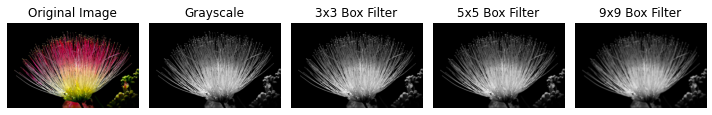

In [10]:
# Define the masks
mask_3x3 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])/ 9.0

mask_5x5 = np.array([[1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1]])/ 25.0

mask_9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1]])/ 81.0

def filter2D(image, kernel):
    iH, iW = image.shape
    kH, kW = kernel.shape
    pad = (kW - 1) // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = padded_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            output[y - pad, x - pad] = (roi * kernel).sum()

    return np.clip(output, 0, 255).astype("uint8")

# Apply the filters using the custom filter2D function
filtered_image_3x3 = filter2D(flower_img, mask_3x3)
filtered_image_5x5 = filter2D(flower_img, mask_5x5)
filtered_image_9x9 = filter2D(flower_img, mask_9x9)

show_images([flower, flower_img, filtered_image_3x3, filtered_image_5x5, filtered_image_9x9], ['Original Image', 'Grayscale', '3x3 Box Filter', '5x5 Box Filter', '9x9 Box Filter' ], cmap='gray')

###### 4.4.2 Smoothing Non-Linear Filters

Non-linear filters operate based on a ranking system for the pixels, rather than linear combinations of their values.

###### Median Filter

In the median filter, each pixel's value is replaced by the median intensity value of its neighbors, including itself.
  
- **How it works**:
    1. Gather intensity values from the pixel's neighborhood.
    2. Sort these values.
    3. Replace the pixel's value with the median of the sorted values. In a $3 \times 3$ neighborhood, the 5th largest value is the median. In a $5 \times 4$ neighborhood, the 13th largest value is the median.
    
- **Applications**: Median filters excel at removing salt-and-pepper noise, which manifests as pixels that greatly differ in intensity from their neighbors. The filter's non-linear nature ensures that these extreme values don't skew the result as they might in a linear filter.



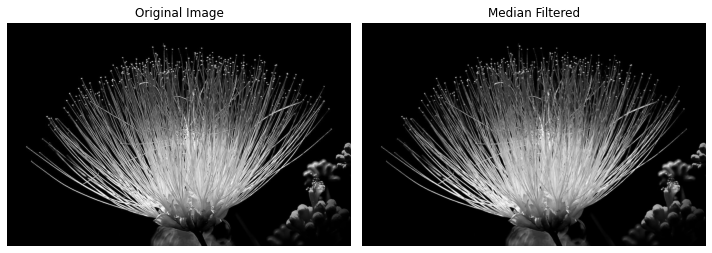

In [11]:
# Apply median filter
median_filtered = cv2.medianBlur(flower_img, 3)  # 3x3 kernel


show_images([flower_img, median_filtered], ['Original Image', "Median Filtered"], cmap='gray')

###### Max and Min Filters

These filters replace each pixel's value with the maximum or minimum intensity value in its neighborhood, respectively.
  
- **Applications**: Useful in applications where the brightest or darkest pixels in an image need highlighting or filtering.

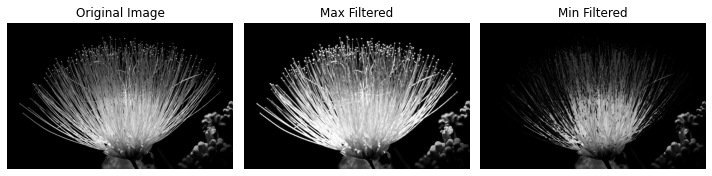

In [12]:
# Apply max filter
max_filtered = cv2.dilate(flower_img, np.ones((3,3), np.uint8))

# Apply min filter
min_filtered = cv2.erode(flower_img, np.ones((3,3), np.uint8))

show_images([flower_img, max_filtered, min_filtered ], ['Original Image', "Max Filtered","Min Filtered"], cmap='gray')

###### Gaussian Low Pass Filter

This filter multiplies the frequency components of an image by a Gaussian function, reducing the high-frequency components more than the low-frequency ones.
  
- **Formula**:
$$ G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} $$
Where $ \sigma $ is the standard deviation of the Gaussian distribution.

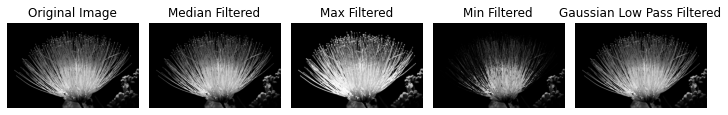

In [13]:
# Apply Gaussian low pass filter
gaussian_filtered = cv2.GaussianBlur(flower_img, (3,3), sigmaX=1, sigmaY=1)

show_images([flower_img, median_filtered, max_filtered, min_filtered, gaussian_filtered ], ['Original Image', "Median Filtered",  "Max Filtered","Min Filtered","Gaussian Low Pass Filtered"], cmap='gray')

In summary, non-linear smoothing filters like the median, max, and min filters offer a different approach to image enhancement than their linear counterparts. They are especially effective at handling specific types of noise and preserving the more crucial details of an image. The Gaussian Low Pass Filter is an example of a filter that attenuates high-frequency noise while preserving the main structures of an image.

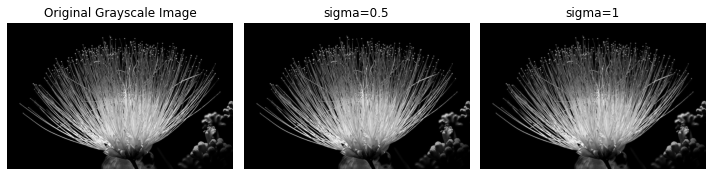

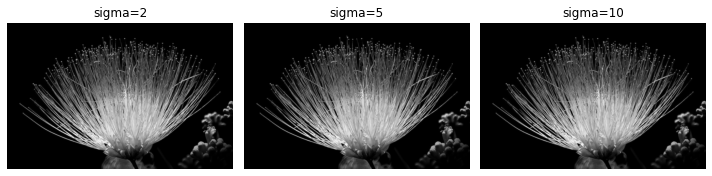

In [14]:
# Apply Gaussian low pass filter with different standard deviations
gaussian_filtered_0_5 = cv2.GaussianBlur(flower_img, (3, 3), sigmaX=0.5, sigmaY=0.5)
gaussian_filtered_1 = cv2.GaussianBlur(flower_img, (3, 3), sigmaX=1, sigmaY=1)
gaussian_filtered_2 = cv2.GaussianBlur(flower_img, (3, 3), sigmaX=2, sigmaY=2)
gaussian_filtered_5 = cv2.GaussianBlur(flower_img, (3, 3), sigmaX=5, sigmaY=5)
gaussian_filtered_10 = cv2.GaussianBlur(flower_img, (3, 3), sigmaX=10, sigmaY=10)

show_images([flower_img,gaussian_filtered_0_5, gaussian_filtered_1], ['Original Grayscale Image', 'sigma=0.5', 'sigma=1'], cmap='gray')
show_images([gaussian_filtered_2, gaussian_filtered_5, gaussian_filtered_10], ['sigma=2', 'sigma=5','sigma=10'], cmap='gray')


### 4.5 Sharpening Filters
Sharpening filters in image processing are designed to highlight edges and fine details in pictures. While smoothing filters blend the pixel values to reduce noise and detail, sharpening filters do the opposite by accentuating differences in adjacent pixel values.

Mathematically, this process is spatial differentiation. This process is very useful in those applications where fine details are required to be observed in an image, e.g., medical applications where every small deformity in the image needs to be observed

#### 4.5.1	Unsharp Masking
A common sharpening technique is called Unsharp Masking (USM). It works by enhancing edges and details in the image that are not captured by a blurred version of the same image. The principle behind USM is that subtracting a blurred copy from the original image will cancel out the areas where the pixel values are similar (i.e., smooth areas), but will enhance areas where the pixel values change rapidly (i.e., edges).

The USM formula can be expressed as:

$$ f'(x, y) = f(x, y) + \alpha \times (f(x, y) - \overline{f}(x, y))$$

Where:
- $ f'(x, y) $ is the sharpened image,
- $ f(x, y) $ is the original image,
- $ \overline{f}(x, y) $ is the blurred image, and
- $ \alpha $ is a scaling factor that controls the amount of sharpening.

The sharpening filter often used in this technique is represented by a matrix (kernel), which is convolved with the image. A typical example of such a kernel is:

$$
\frac{1}{9} \times \begin{bmatrix}
-1 & -1 & -1 \\
-1 &  8 & -1 \\
-1 & -1 & -1 \\
\end{bmatrix}
$$

This kernel emphasizes the center pixel value while reducing the surrounding pixel values, effectively highlighting the differences, which results in the sharpening effect.

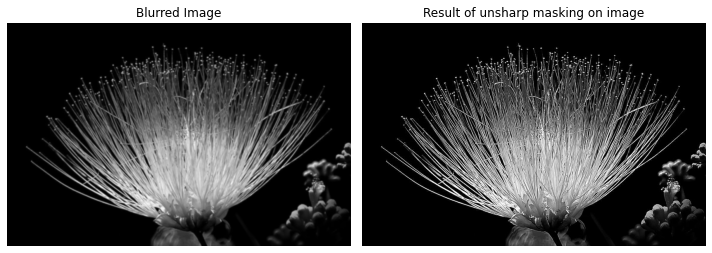

In [15]:
def unsharp_masking(image, alpha=1.5, kernel_size=(5,5)):
    # Apply Gaussian blur to the original image
    blurred_image = cv2.GaussianBlur(image, kernel_size, 2)
    
    # Sharpen the image by adding the original image and the negative blurred image
    sharpened_image = cv2.addWeighted(image, 1 + alpha, blurred_image, -alpha, 0)
    
    return blurred_image, sharpened_image

# Apply unsharp masking
blurred_image, sharpened_image = unsharp_masking(flower_img)

# Display the sharpened image
show_images([blurred_image, sharpened_image], ['Blurred Image', 'Result of unsharp masking on image'], cmap='gray')


### 4.6	Bit-Plane Slicing
Bit-plane slicing is a technique in digital image processing that allows us to decompose an image into its constituent bits at different significance levels. This is particularly useful for analyzing the contribution of each bit level to the total appearance of the image.

Consider an 8-bit grayscale image, where each pixel is represented by an 8-bit binary number. The highest-order bit (the 8th bit) contributes the most to the pixel's intensity value, while the lowest-order bit (the 1st bit) contributes the least. By separating these bits into different planes, we can observe the varying effects they have on the image's visual characteristics.

For example, altering the most significant bit (MSB) would result in major changes in brightness, whereas changes in the least significant bit (LSB) might not even be perceptible to the human eye. This is why the LSB is sometimes used for embedding hidden data within an image, a method known as steganography.

In the context of image compression, bit-plane slicing is valuable because it shows that not all bits have the same level of importance. By discarding the less significant bit-planes, we can reduce the image's file size with minimal loss in visual quality.

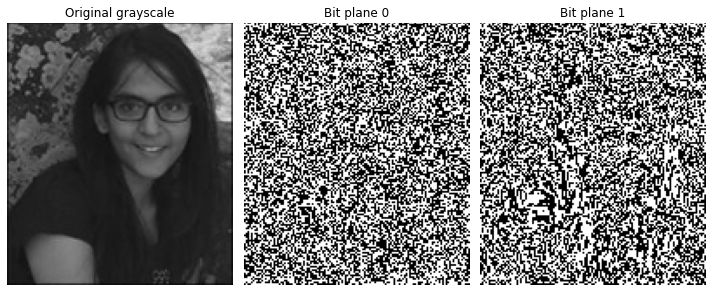

In [16]:
pixel_array = np.array(girl_img)

# Function to isolate the k-th bit of each pixel in the array
def bit_plane_slice(pixel_array, k):
    return (pixel_array & (1 << k)) >> k

# Reconstruct the 8-bit image from bit planes
reconstructed_image = np.zeros_like(pixel_array)
for i in range(8):
    reconstructed_image += bit_plane_slice(pixel_array, i) * (1 << i)

# Reconstruct the 4-bit image from the higher bit planes
high_bit_reconstructed_image = np.zeros_like(pixel_array)
for i in range(4, 8):
    high_bit_reconstructed_image += bit_plane_slice(pixel_array, i) * (1 << i)

# Collect images and titles for displaying
plane0, plane1, plane2, plane3, plane4, plane5, plane6, plane7 = [bit_plane_slice(pixel_array, i) * 255 for i in range(8)]

# Display the bit planes using the provided function
show_images([girl_img, plane0, plane1], ['Original grayscale','Bit plane 0', 'Bit plane 1'], cmap='gray')

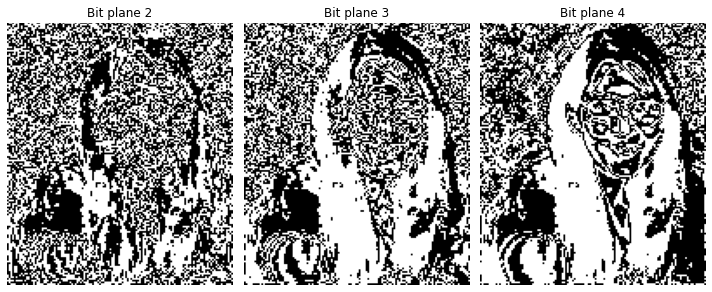

In [17]:
show_images([plane2, plane3, plane4,], ['Bit plane 2', 'Bit plane 3', 'Bit plane 4'], cmap='gray')

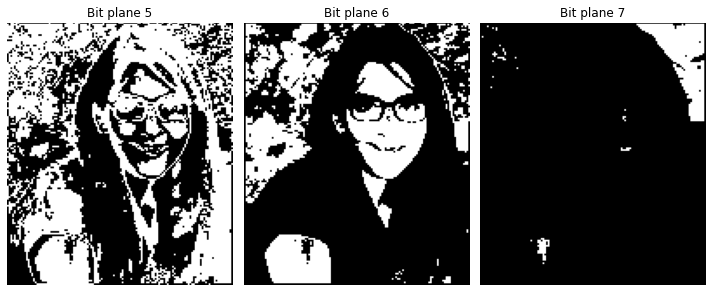

In [18]:
show_images([plane5, plane6, plane7,], ['Bit plane 5', 'Bit plane 6', 'Bit plane 7' ], cmap='gray')

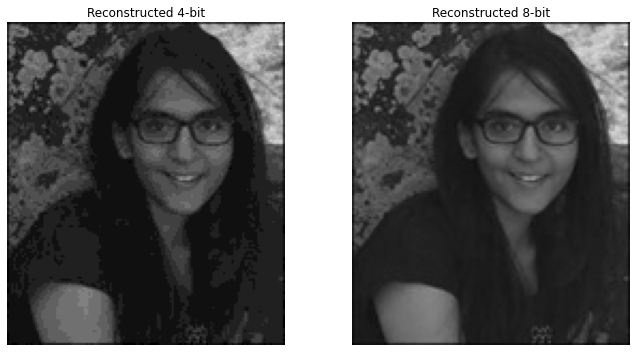

In [19]:
show_images([high_bit_reconstructed_image, reconstructed_image], ['Reconstructed 4-bit', 'Reconstructed 8-bit'], cmap='gray')


### 4.7 Arithmetic Operations

Arithmetic operations are fundamental in image processing and allow for direct manipulation of the pixel values in an image. Common operations include addition, subtraction, multiplication, and division, which can be applied to images to achieve various effects and transformations.

#### 4.7.1 Image Addition
Image addition is a process where corresponding pixels from two images are added together to form a new image. For two images, $ f(x,y) $ and $ g(x,y) $, image addition results in a combined image, $ h(x,y) $:

$$ h(x,y) = f(x,y) + g(x,y) $$

To perform this operation, the dimensions of both images must be identical, as the operation is applied on a per-pixel basis. In environments like Python, which treat images as matrices, the addition operation is as straightforward as using the '+' operator:

```python
h = f + g;
```

This matrix-based approach is intuitive because it aligns with the mathematical definition of matrix addition. In the context of digital images, this operation is often subject to overflow handling, where pixel values that exceed the maximum allowed intensity are capped. For instance, in an 8-bit image where pixel values range from 0 to 255, any resulting value above 255 after addition is typically set to 255.

Image addition can be used for various purposes such as brightness enhancement, blending images, or for adding a watermark to an image. It's important to note that while addition increases the brightness of an image, care must be taken to avoid overexposure, where details in bright regions may be lost.

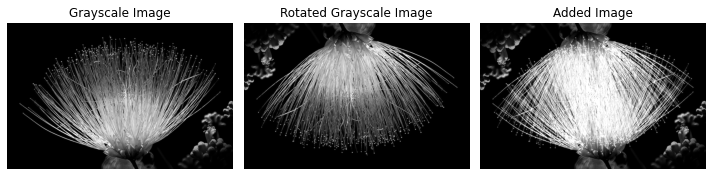

In [20]:
# Rotate the grayscale image 180 degrees
rotated_image = cv2.rotate(flower_img, cv2.ROTATE_180)

# Add the original grayscale and the rotated images
added_image = cv2.add(np.uint16(flower_img), np.uint16(rotated_image))
added_image = np.clip(added_image, 0, 255).astype(np.uint8)

# Use the show_images function to display the images
show_images([flower_img, rotated_image, added_image],['Grayscale Image', 'Rotated Grayscale Image', 'Added Image'],cmap='gray')

#### 4.7.2 Image Subtraction

Image subtraction is a technique to highlight the differences between two images, \( f(x, y) \) and \( g(x, y) \), by subtracting one from the other:

$ h(x, y) = f(x, y) - g(x, y) $

In this operation, the image $ g(x, y) $ is effectively "deleted" from $ f(x, y) $, revealing the differences as a new image,$h(x, y)$. Both images must have the same dimensions to perform this binary operation. It is important to note that subtraction is not commutative—$ f(x, y) - g(x, y) $ is not equal to $ g(x, y) - f(x, y) $, and the difference will be visible in the resulting image.

In Python, particularly with libraries like OpenCV that treat images as NumPy arrays, image subtraction can be performed simply using the '-' operator, analogous to matrix subtraction:

```python
h = cv2.subtract(f, g)
```

Image subtraction can expose artifacts or changes that are not readily visible in either of the original images, making it a powerful tool for image analysis.

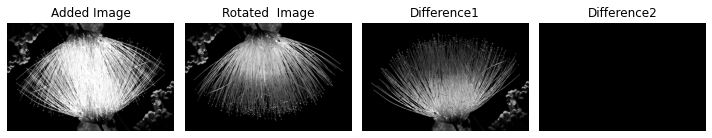

In [21]:
# Subtract the images using OpenCV
diff1 = cv2.subtract(added_image, rotated_image)
# Subtract the images using OpenCV
diff2 = cv2.subtract(rotated_image, added_image)

show_images([added_image, rotated_image, diff1, diff2],['Added Image', 'Rotated  Image', 'Difference1', 'Difference2'],cmap='gray')

#### 4.7.3 Image Multiplication
Image multiplication is a technique commonly used in image processing to isolate or emphasize certain areas of an image. This operation can be particularly useful when one wishes to focus on a region of interest (ROI). By creating a mask where the ROI is represented by pixel values of 1 and the rest of the image is set to 0, and then multiplying this mask by the original image, we can effectively extract the ROI. The pixels in the ROI retain their original values, while the rest of the image becomes black.

In Python, image multiplication can be performed using the OpenCV library, which provides the `multiply` function. This function can be used to multiply two images element-wise or to scale the pixel values of an image by a constant. Here's how it can be used for both purposes:

To multiply two images:
```python
result = cv2.multiply(image1, image2)
```

To scale an image by a constant:
```python
result = cv2.multiply(image, scalar_value)
```

When multiplying an image by a mask, the mask must be the same size as the image and typically the same data type.

#### 4.7.4 Image Division
Image division is a technique that can be used to normalize pixel values or to correct for variations in lighting across an image. It involves dividing the pixel values of one image by the corresponding pixel values of another image or by a constant.

In Python image division can be performed by using the division operator or the divide function from NumPy, which can handle division by zero more gracefully by allowing you to specify a value to use when a division by zero occurs.

#### 4.8 Logical Operations

Logical operations such as AND, OR, and NOT are pivotal in binary image processing, where images are viewed as sets of pixels and operations are applied to each pixel in a binary (0 or 1) fashion. These operations are analogous to set operations, with AND corresponding to intersection, OR to union, and NOT to complement.

- **AND Operation**: This operation is applied to two binary images. The result is a new image where a pixel is set to 1 (or 'true') only if the corresponding pixel is set to 1 in both input images. This is similar to the intersection of two sets and can be used for masking where only the common features of both images are retained.

- **OR Operation**: This operation is applied to two binary images. A pixel in the resulting image is set to 1 if the corresponding pixel is set to 1 in either one of the input images. This is analogous to the union of two sets and is often used to combine features from both images.

- **NOT Operation**: Unlike AND and OR, the NOT operation is applied to a single binary image. It inverts the pixels in the image, changing 1s to 0s and vice versa. This operation is similar to taking the complement of a set or producing the negative of an image.

These logical operations can be used in various image processing tasks, including:

- Masking a region of interest by ANDing an image with a mask.
- Combining multiple binary masks or features with OR.
- Inverting a mask or binary image using NOT.

It is important to note that while AND and OR require two images, they do not need to be of the same size, unlike arithmetic operations like addition and subtraction. This allows for greater flexibility when applying logical operations to different regions or features within an image.

#### 4.9 Geometric Operations

Geometric transformations are unary operations that modify the spatial arrangement of pixels in an image. They include scaling (zooming and shrinking), translation, rotation, and cropping.

##### 4.9.1 Zooming and Shrinking
Zooming in on an image increases its size by interpolating additional pixels, which can be performed for temporary viewing or permanently resizing. Shrinking reduces the size of an image by removing pixels. OpenCV provides the `resize` function, which allows specifying the interpolation method (nearest, linear, cubic, etc.):

```python
# Zooming (enlarging) the image by 2 times
zoomed_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Shrinking (reducing) the image to half
shrunk_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
```

##### 4.9.2 Translation
Translation shifts an image within its plane by a certain distance (∆x, ∆y). This affine transformation can be performed using OpenCV's `warpAffine` function, which requires a translation matrix:

```python
# Define the translation matrix
dx, dy = 50, 50  # Displacement along the x and y axis
trans_mat = np.float32([[1, 0, dx], [0, 1, dy]])

# Apply the translation
translated_image = cv2.warpAffine(image, trans_mat, (image.shape[1], image.shape[0]))
```

##### 4.9.3 Rotation
Rotation involves turning an image around a specified pivot point by a certain angle. This is also an affine transformation and maintains straight lines:

```python
# Define the rotation center, angle, and scale factor
center = (image.shape[1]//2, image.shape[0]//2)  # Image center
angle = 45  # Rotation angle in degrees
scale = 1.0  # Scale factor

# Get the rotation matrix
rot_mat = cv2.getRotationMatrix2D(center, angle, scale)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]))
```

##### 4.9.4 Cropping
Cropping involves selecting a region of interest (ROI) and removing the outside parts. It can be done by slicing the NumPy array that represents an image:

```python
# Define the ROI
x, y, w, h = 100, 100, 200, 200  # x, y coordinates and width, height of the ROI

# Crop the image
cropped_image = image[y:y+h, x:x+w]
```

These operations are often used in a variety of applications, including photo editing, computer vision tasks, and pre-processing steps for machine learning models.

#### 4.10 Image Padding

Image padding is a technique used to enlarge the boundary of an image by adding extra 'rows' and 'columns' around it. This approach is commonly employed when applying convolution operations, especially when the kernel or mask needs to be applied to the pixels at the image's edge. Padding solves the problem of undefined neighboring pixels for boundary elements.

When padding an image, there are several strategies to determine the new pixel values:

- **Zero Padding**: Adding rows and columns with values of zero. This approach may create artifacts at the image borders due to the abrupt drop to zero intensity.
- **One Padding**: Similar to zero padding, but with ones instead. This is less common and can lead to bright artifacts at the borders.
- **Edge Padding**: The border pixels are replicated to the new rows and columns. This maintains the intensity of the image's edges and is less likely to introduce artifacts.
- **Reflect Padding**: Mirrors the image at the borders. This can be a useful technique when the border continuity is desired.

Padding not only aids in mask processing but is also used to conform images to a desired size for various applications, such as input into neural networks that require fixed-size images.

In Python, the `numpy.pad` function is often used to pad images. Here's an example of how to apply different types of padding to an image using NumPy:

#### 4.11 Histogram and Histogram Processing
Histograms visually represent the distribution of pixel intensities in an image. Think of an image as a collection of pixels, each varying in brightness or darkness. These variations are what we call intensity levels. A histogram, resembling a bar chart, displays the frequency of these intensity levels across the image.

Key Concepts:

1. **Intensity Levels**: These are the different shades in an image, ranging from black (0) to the maximum level of gray. In an image with 'L' intensity levels, you have 'L' shades of gray.

2. **Histogram Structure**: It consists of two axes: the horizontal (X-axis) represents different intensity levels, while the vertical (Y-axis) shows the count of pixels for each intensity level. A high bar at a specific point on the X-axis indicates a large number of pixels with that particular gray shade.

3. **Normalized Histogram**: For comparative analysis, normalizing a histogram is useful. This involves dividing the pixel count at each intensity level by the total number of pixels, thereby converting absolute numbers into percentages.

In Python, `matplotlib` and `PIL` (Python Imaging Library) are commonly used for image processing and generating histograms. The `hist` function from `matplotlib.pyplot` can be used similarly to the `imhist` function in MATLAB.

Histogram Insights:

- **Dark Images**: Histogram bars clustered near 0 suggest a predominantly dark image.
- **Bright Images**: Bars near the maximum gray level indicate a bright image.
- **Contrast**: Wide distribution of bars signifies high contrast, whereas concentration in a narrow range indicates low contrast.

Histograms also play a crucial role in image enhancement, particularly through a process known as histogram equalization.

##### 4.11.1 Histogram Equalization
Histogram equalization is a technique used to enhance images, especially those with poor exposure leading to dominance of dark or bright pixels. This method aims to evenly distribute the histogram over the full intensity scale. Mathematically, it involves calculating cumulative sums of pixel intensities for each gray level 'x'. The cumulative frequency $ t(x) $ relates to the total number of gray levels 'g' and the total number of pixels 'n' in the image, as shown in the formula:
$$ f(x) = \frac{g \cdot t(x)}{n} - 1 $$

Here, $ f(x) $ represents the new intensity value assigned to the original intensity 'x' after equalization. This equalization process results in a more balanced contrast, enhancing the overall visual quality of the image.


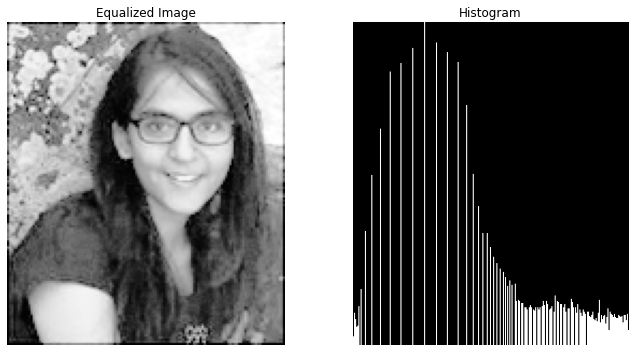

In [37]:
# Perform histogram equalization using OpenCV
equalized_img = cv2.equalizeHist(girl_img)

# Calculate the histogram using OpenCV
histogram = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
histogram = histogram.reshape(-1)  # Flatten the histogram for plotting

# Prepare the histogram to be displayed as an image
hist_image = np.zeros((300, 256), dtype=np.uint8)
for i in range(256):
    cv2.line(hist_image, (i, 300), (i, 300 - int(histogram[i] * 300 / max(histogram))), 255, 1)

# Flip the histogram image vertically
#hist_image = cv2.flip(hist_image, 0)

# Display the original image and histogram on the same line
show_images([equalized_img, hist_image], ['Equalized Image', 'Histogram'], cmap='gray')

